# libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

# import data

In [ ]:
df_seg = pd.read_csv('Churn_Modellingclustering.csv')

# explore data

In [ ]:
df_seg.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [ ]:
df_seg.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


# correlation estimate

In [ ]:
#df_seg = df_seg.drop(["RowNumber", "CustomerId", "Surname",'CreditScore','Balance','NumOfProducts', 'IsActiveMember','Exited','Tenure'], axis = 1)
y = df_seg['Exited']
df_seg = df_seg.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis = 1)

In [ ]:
df_seg

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,502,France,Female,42,8,159660.80,3,1,0,113931.57
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67
...,...,...,...,...,...,...,...,...,...,...
2032,498,Germany,Male,42,3,152039.70,1,1,1,53445.17
2033,655,Germany,Female,46,7,137145.12,1,1,0,115146.40
2034,597,France,Female,53,4,88381.21,1,1,0,69384.71
2035,709,France,Female,36,7,0.00,1,0,1,42085.58


In [ ]:
df_seg.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder   
#le_encode = LabelEncoder()  
#df_seg['Gender']= le_encode.fit_transform(df_seg['Gender']) 
#df_seg['Geography']= le_encode.fit_transform(df_seg['Geography']) 

# Gender 0-Female,1-Male
# Geography 0-France,1-Germany,2-Spain

In [ ]:
df_seg = pd.get_dummies(data=df_seg, columns=['Gender','Geography'])

In [ ]:
df_seg.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
2,645,44,8,113755.78,2,1,0,149756.71,0,1,0,0,1
3,376,29,4,115046.74,4,1,0,119346.88,1,0,0,1,0
4,653,58,1,132602.88,1,1,0,5097.67,0,1,0,1,0
5,510,38,4,0.00,1,1,0,118913.53,1,0,0,0,1
6,591,39,3,0.00,3,1,0,140469.38,1,0,0,0,1
7,475,45,0,134264.04,1,1,0,27822.99,1,0,1,0,0
8,465,51,8,122522.32,1,0,0,181297.65,1,0,1,0,0
9,834,49,2,131394.56,1,0,0,194365.76,1,0,1,0,0


# standariztion 

In [ ]:
scaler = StandardScaler()
seg_std = scaler.fit_transform(df_seg)

# Hierarchical clustering

In [ ]:
hier_clust = linkage(seg_std, method = 'ward')

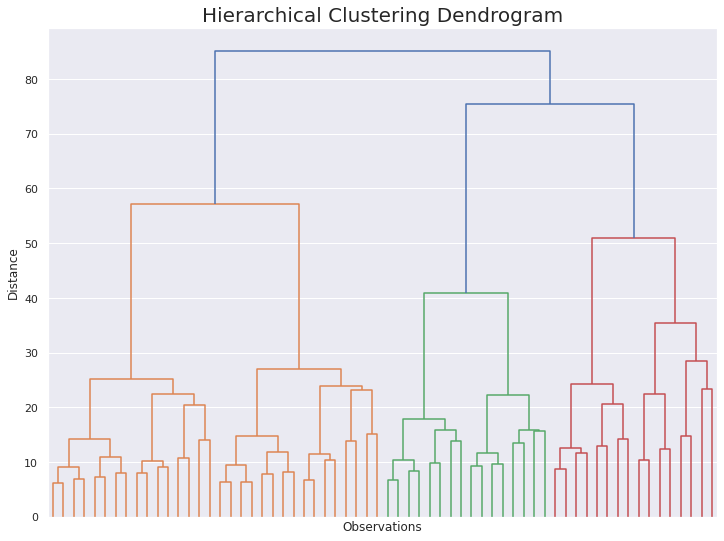

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 20)
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True)
#color_threshold = 0
plt.show()

# K-means clustering

In [ ]:
wcss, silhouette = [],[]
for i in range(2,11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    Kmeans.fit(seg_std)
    predicted_labels= Kmeans.fit_predict(seg_std)
    s= silhouette_score(seg_std, predicted_labels)
    wcss.append(Kmeans.inertia_)
    silhouette.append(s)

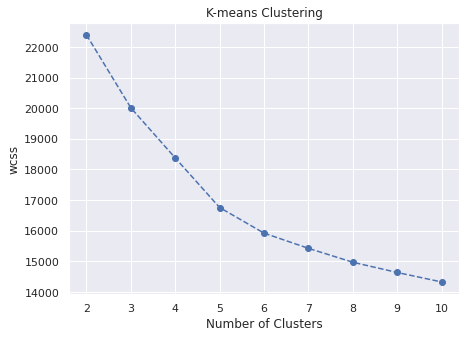

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(range(2,11), wcss, marker ='o',linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('K-means Clustering')
plt.show()

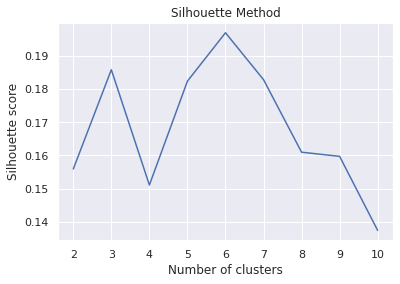

In [ ]:
plt.plot(range(2, 11),  silhouette)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

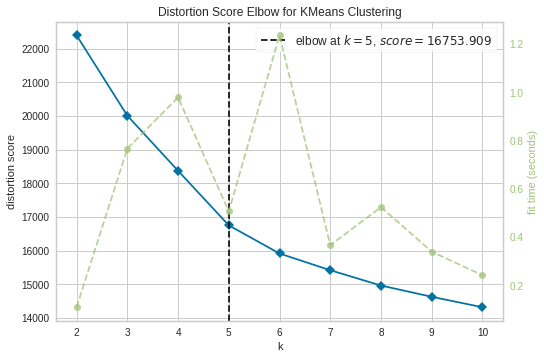

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer 
# Load the IRIS dataset 
# Instantiate the clustering model and visualizer 
km = KMeans(random_state=42) 
visualizer=KElbowVisualizer(km, k=(2,11)) 
visualizer.fit(seg_std)
# Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [ ]:
Kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [ ]:
Kmeans.fit(seg_std)

KMeans(n_clusters=5, random_state=42)

# result

In [ ]:
df_seg_kmeans = df_seg.copy()
df_seg_kmeans['segment k-means'] = Kmeans.labels_

In [ ]:
df_seg_analysis = df_seg_kmeans.groupby(['segment k-means']).mean()
df_seg_analysis

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
segment k-means,,,,,,,,,,,,,
0,647.484262,44.147700,4.656174,72513.352446,1.513317,0.673123,0.341404,103629.554818,0.559322,0.440678,0.0,0.0,1.0
1,643.964481,44.975410,4.920765,121202.242432,1.439891,0.710383,0.357923,96591.601257,0.000000,1.000000,0.0,1.0,0.0
2,650.732143,44.828125,5.075893,119673.872321,1.466518,0.707589,0.368304,99884.458728,1.000000,0.000000,0.0,1.0,0.0
3,639.308571,44.871429,5.102857,75710.827800,1.431429,0.708571,0.360000,103193.839686,0.000000,1.000000,1.0,0.0,0.0
4,643.897826,45.332609,4.921739,67755.162630,1.510870,0.697826,0.373913,103626.025065,1.000000,0.000000,1.0,0.0,0.0


In [ ]:
df_seg_analysis = df_seg_kmeans.groupby(['segment k-means']).mean()
df_seg_analysis

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
segment k-means,,,,,,,,,,,,,
0,647.484262,44.147700,4.656174,72513.352446,1.513317,0.673123,0.341404,103629.554818,0.559322,0.440678,0.0,0.0,1.0
1,643.964481,44.975410,4.920765,121202.242432,1.439891,0.710383,0.357923,96591.601257,0.000000,1.000000,0.0,1.0,0.0
2,650.732143,44.828125,5.075893,119673.872321,1.466518,0.707589,0.368304,99884.458728,1.000000,0.000000,0.0,1.0,0.0
3,639.308571,44.871429,5.102857,75710.827800,1.431429,0.708571,0.360000,103193.839686,0.000000,1.000000,1.0,0.0,0.0
4,643.897826,45.332609,4.921739,67755.162630,1.510870,0.697826,0.373913,103626.025065,1.000000,0.000000,1.0,0.0,0.0


In [ ]:
df_seg_kmeans.to_excel("clusters2.xlsx")

In [ ]:
df_seg_analysis.to_excel("clusters3.xlsx")

In [ ]:
clusters_names = {i:f'C{i}' for i in range(len(df_seg_analysis))}
df_seg_analysis.rename(clusters_names)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
segment k-means,,,,,,,,,,,,,
C0,647.484262,44.147700,4.656174,72513.352446,1.513317,0.673123,0.341404,103629.554818,0.559322,0.440678,0.0,0.0,1.0
C1,643.964481,44.975410,4.920765,121202.242432,1.439891,0.710383,0.357923,96591.601257,0.000000,1.000000,0.0,1.0,0.0
C2,650.732143,44.828125,5.075893,119673.872321,1.466518,0.707589,0.368304,99884.458728,1.000000,0.000000,0.0,1.0,0.0
C3,639.308571,44.871429,5.102857,75710.827800,1.431429,0.708571,0.360000,103193.839686,0.000000,1.000000,1.0,0.0,0.0
C4,643.897826,45.332609,4.921739,67755.162630,1.510870,0.697826,0.373913,103626.025065,1.000000,0.000000,1.0,0.0,0.0


In [165]:
df_seg_kmeans['labels'] = df_seg_kmeans['segment k-means'].map(clusters_names)

In [166]:
new_x = df_seg_kmeans.drop(['segment k-means', 'labels'], axis=1)

In [167]:
sc = StandardScaler().fit(new_x)
new_x = sc.transform(new_x)

In [168]:
# apply PCA as Dimensionality reduction
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

new_x_pca = PCA(n_components=2).fit_transform(new_x)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


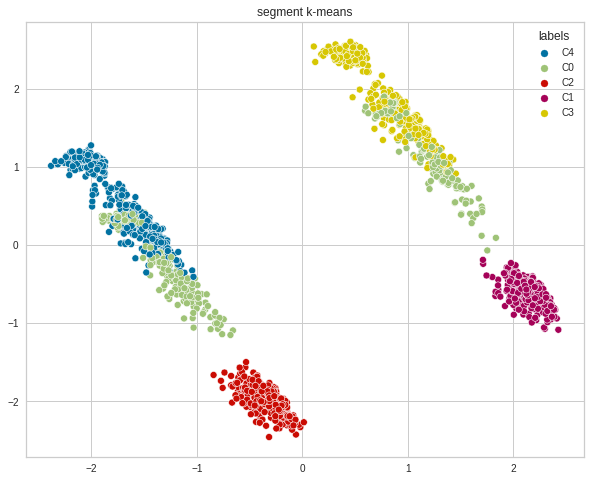

In [169]:
plt.figure(figsize = (10, 8))
sns.scatterplot(new_x_pca[:,0], new_x_pca[:,1], hue = df_seg_kmeans['labels'])#, palette = ['g','r','c','m'])
plt.title('segment k-means')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


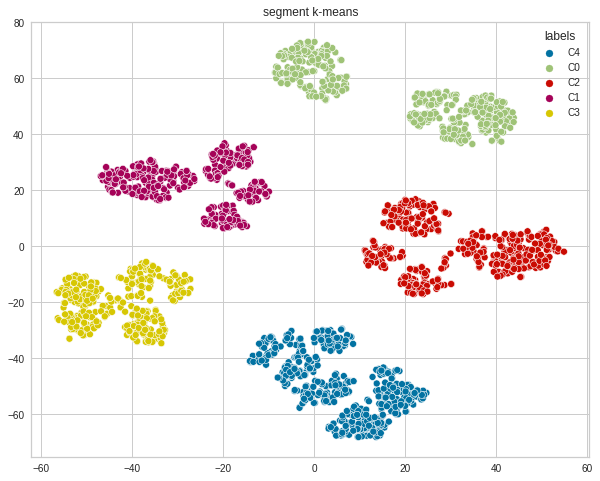

In [170]:
new_x_tsne = TSNE(n_components=2).fit_transform(new_x)

plt.figure(figsize = (10, 8))
sns.scatterplot(new_x_tsne[:,0], new_x_tsne[:,1], hue = df_seg_kmeans['labels'])#, palette = ['g','r','c','m'])
plt.title('segment k-means')
plt.show()

# data export

In [ ]:
pickle.dump(Kmeans, open('clusters.pickle','wb'))